Import libraries

In [5]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [117]:
import tensorflow as tf

In [105]:
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [3]:
! pip install tensorflow

In [11]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(location)

cancer_df = read_file("Desktop/cancer-ML-practice/Data 23/cancer_gene_expression.zip")

In [15]:
np.shape(cancer_df)

(801, 8001)

In [17]:
cancer_df.head(n=5)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [13]:
cancer_df

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [35]:
cancer_df["Cancer_Type"].head()

0    KIRC
1    KIRC
2    BRCA
3    KIRC
4    COAD
Name: Cancer_Type, dtype: object

In [21]:
print(cancer_df.columns[:3], cancer_df.columns[-1])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object') Cancer_Type


Exploration and cleaning

In [47]:
datanul = cancer_df.isnull().sum()
g = [val for val in datanul if val > 0]

In [49]:
print(f"Columns with missing values: {g}")

Columns with missing values: []


In [51]:
# check different cancer types
print(cancer_df["Cancer_Type"].value_counts()) # classes

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


Data Preprocessing

In [53]:
# need to put data in the appropriate format before modelling
# separate features from the class
X = cancer_df.iloc[:,0:-1]
y = cancer_df.iloc[:,-1]

In [57]:
print(np.shape(X), np.shape(y), np.shape(cancer_df))

(801, 8000) (801,) (801, 8001)


In [65]:
# encode labels -> categorical -> discrete
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y)
nclasses = np.unique(y).shape[0]

In [69]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [75]:
print(classes, nclasses)

[0 1 2 3 4] 5


Normalisation -> avoid imbalance

In [77]:
X

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,6.883022,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,6.271456,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,8.417734,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,4.767210,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,7.594086,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,7.609312,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,6.439361,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,7.344802,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,6.799502,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232


In [81]:
# scale between 0-1
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [85]:
X # scaled up between 0 - 1

array([[0.        , 0.        , 0.        , ..., 0.25878855, 0.58811962,
        0.2144499 ],
       [0.        , 0.        , 0.        , ..., 0.2444709 , 0.40934134,
        0.25137454],
       [0.        , 0.        , 0.        , ..., 0.556377  , 0.22771114,
        0.4553066 ],
       ...,
       [0.        , 0.06209534, 0.        , ..., 0.44674961, 0.45364308,
        0.14356794],
       [0.        , 0.09722157, 0.        , ..., 0.43021046, 0.43232813,
        0.06563993],
       [0.        , 0.        , 0.        , ..., 0.37001869, 0.6469206 ,
        0.09512577]])

In [87]:
y

array([2, 2, 0, 2, 1, 3, 2, 3, 0, 1, 4, 0, 4, 4, 2, 4, 2, 3, 3, 4, 0, 1,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 4, 0, 0, 1, 0,
       3, 2, 1, 1, 2, 0, 4, 1, 0, 3, 3, 0, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0,
       1, 2, 2, 0, 1, 1, 0, 4, 2, 0, 4, 3, 1, 2, 2, 3, 2, 0, 0, 0, 4, 3,
       0, 3, 4, 2, 0, 0, 0, 2, 4, 2, 0, 4, 3, 3, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 2, 3, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 1, 4, 1, 3, 1, 3, 0, 1, 0, 0, 0,
       2, 1, 1, 3, 3, 4, 3, 0, 3, 2, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       3, 2, 1, 3, 0, 0, 3, 0, 4, 4, 3, 1, 0, 0, 0, 4, 1, 0, 4, 0, 4, 1,
       0, 4, 2, 4, 4, 0, 3, 0, 3, 0, 0, 2, 2, 3, 2, 3, 4, 0, 2, 3, 3, 1,
       3, 0, 4, 3, 0, 1, 3, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 0, 2, 3, 0,
       3, 0, 2, 4, 0, 2, 4, 0, 0, 4, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0, 4, 2,
       2, 4, 0, 3, 0, 0, 0, 4, 3, 0, 0, 2, 3, 2, 3, 4, 3, 1, 0, 0, 3, 2,
       0, 1, 0, 4, 3, 1, 3, 1, 2, 3, 2, 1, 0, 0, 3,

Data Splitting

In [91]:
# split into test and training sets and validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# split training set into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [95]:
print(np.shape(X_train), np.shape(y_train))

(512, 8000) (512,)


In [97]:
print(np.shape(X_test), np.shape(y_test))

(161, 8000) (161,)


In [99]:
print(np.shape(X_val), np.shape(y_val))

(128, 8000) (128,)


Build NN

In [119]:
model = Sequential() # 3-4 layers

# input layer 
model.add(Input(shape=(X_train.shape[1],)))

# hidden layer 1
model.add(Dense(40, activation = "relu"))

# hidden layer 2
model.add(Dense(20, activation="relu"))

# output layer
model.add(Dense(nclasses, activation = "softmax"))

# define optimiser and learning rate
opt_adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = opt_adam, metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [123]:
# fit model to training data
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 200, verbose = 1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6633 - sparse_categorical_accuracy: 0.2715 - val_loss: 1.2484 - val_sparse_categorical_accuracy: 0.4141
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2189 - sparse_categorical_accuracy: 0.5534 - val_loss: 0.9561 - val_sparse_categorical_accuracy: 0.6250
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8543 - sparse_categorical_accuracy: 0.7279 - val_loss: 0.7122 - val_sparse_categorical_accuracy: 0.7578
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5706 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.4709 - val_sparse_categorical_accuracy: 0.9609
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3797 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.3417 - val_sparse_categorical_accuracy: 0.9844
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.2436 - val_sparse_categorical_accuracy: 0.9844
Epoch 7/2

In [125]:
predictions = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test, verbose = 0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [129]:
# get predictions for the first 20 samples of the test set
for index, entry in enumerate(predictions[0:20, :]):
    print("predicted:%d ,actual:%d"%(np.argmax(entry), y_test[index]))

predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:4 ,actual:4
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:3 ,actual:3
predicted:3 ,actual:3
predicted:3 ,actual:3
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:1 ,actual:1
predicted:0 ,actual:0
predicted:3 ,actual:3


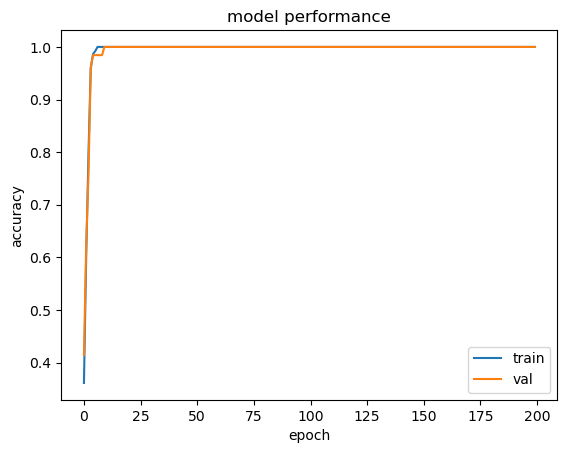

In [131]:
# summarise history for accuracy
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.title("model performance")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "lower right")
plt.show()

In [ ]:
# summarise history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "lower right")
plt.show()